In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import torch
import copy
from matplotlib.colors import hsv_to_rgb
import pandas as pd

In [2]:
data = pd.read_csv('\\\\NAS_LOCCO\\Amaury\\DATA\\4_polar_MFM_these\\anneLise1.csv', delimiter=';')
frame = data['frame']
x = data['x']
y = data['y']
z = data['z']
rho = data['rho']
eta = data['eta']
delta = data['delta']
N_photons = data['N_photon']
offset_polar = data['offset_polar']
score = data['score']
x_start = data['x_start']
y_start = data['y_start']
z_start = data['z_start']
rho_start = data['rho_start']
delta_start = data['delta_start']

In [3]:
eta90 = copy.deepcopy(eta)
for ii in range(len(eta90)):
    if eta90[ii]>90:
        eta90[ii] = 180.-eta90[ii]

Text(0, 0.5, 'Occurences')

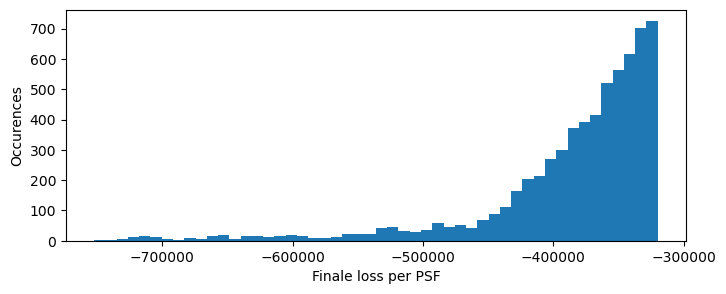

In [4]:
plt.rcParams['figure.figsize'] = [8,3]
hist = plt.hist(score, bins=50)
plt.xlabel('Finale loss per PSF')
plt.ylabel('Occurences')

Text(0, 0.5, 'Occurences')

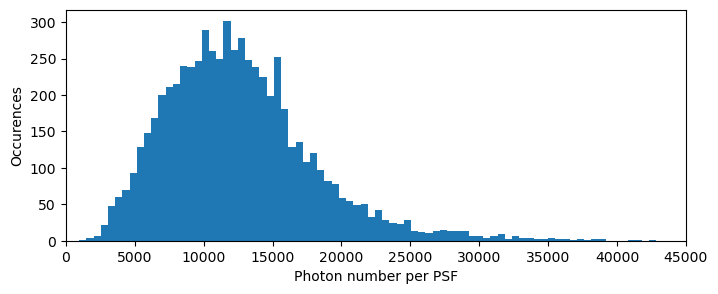

In [5]:
plt.rcParams['figure.figsize'] = [8,3]
hist = plt.hist(N_photons, bins=80)
plt.xlim((0, 45000))
plt.xlabel('Photon number per PSF')
plt.ylabel('Occurences')

Text(0, 0.5, 'Occurences')

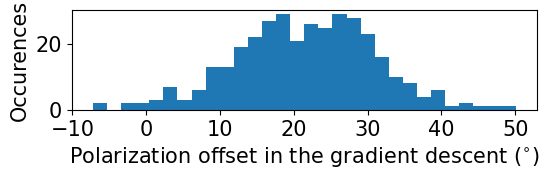

In [6]:
plt.rcParams['figure.figsize'] = [6,1.3]
plt.rcParams.update({'font.size': 15})
hist = plt.hist(offset_polar, bins=30)
plt.xlabel('Polarization offset in the gradient descent ($^{\\circ}$)')
plt.ylabel('Occurences')

In [8]:
threshold = (score<-430000) & (delta<150) #& (x>17500) & (x<200000) & (y>2000) & (y<5500) & (z<1450) & (N_photons>3000) 
threshold2 = (score<-430000) & (delta<150) #& (x>10000) & (x<22500) & (y>2000) & (y<15000)  & (N_photons>3000) 
threshold3 = (score<-430000) & (delta<150) & (x>10000) & (x<22500) & (y>2000) & (y<15000) & (z<1450) & (N_photons>3000)
threshold4 = (score<-430000) & (N_photons>3000) 
bille1 = (score<-430000) & (delta<150) & (x>10000) & (x<16000) & (y>10000) & (y<14000) & (N_photons>3000) & (z<1450)

threshold = (score<-430000) & (delta<150) & (x>17500) & (x<200000) & (y>2000) & (y<5500) & (z<1450) & (N_photons<85000) & (N_photons>6000) 
threshold2 = (score<-430000) & (delta<150) & (x>10000) & (x<22500) & (y>2000) & (y<15000) & (N_photons<85000) & (N_photons>6000) 
threshold3 = (score<-430000) & (delta<150) & (x>10000) & (x<22500) & (y>2000) & (y<15000) & (z<1450) & (N_photons<85000) & (N_photons>6000) 
threshold4 = (score<-430000) & (N_photons<85000) & (N_photons>6000) 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


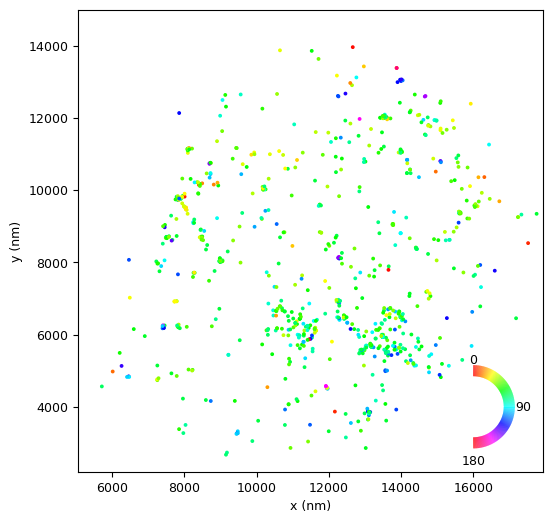

In [13]:
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams.update({'font.size': 9})
hues = rho[threshold2] / 180.0
hsv_colors = np.stack((hues, np.ones_like(hues), np.ones_like(hues)), axis=1)
rgb_colors = hsv_to_rgb(hsv_colors)
plt.scatter(x[threshold2], y[threshold2], c=rgb_colors, s=3)
plt.axis('equal')
plt.xlim((5000, 18000))
plt.ylim((2200, 15000))
plt.xlabel('x (nm)')
plt.ylabel('y (nm)')

# Half-circle colorbar rotated 90° clockwise
center_x, center_y = 16000, 4000
radius = 1000
angles = np.linspace(0, np.pi, 200)  # rotated arc
for i in range(len(angles)-1):
    theta1, theta2 = angles[i], angles[i+1]
    hue = (np.degrees(theta1)) / 180.0  # Map to 0-1 range
    color = hsv_to_rgb([hue, 1, 1])
    arc_x = [center_x + radius * np.cos(np.pi/2-theta1), center_x + radius * np.cos(np.pi/2-theta2)]
    arc_y = [center_y + radius * np.sin(np.pi/2-theta1), center_y + radius * np.sin(np.pi/2-theta2)]
    plt.plot(arc_x, arc_y, color=color, lw=8, solid_capstyle='butt')

# Tick labels with offset
tick_angles = [0, 90, 180]  # Corresponding to hue range
label_offset = [300,400, 500]
for i, ang in enumerate(tick_angles):
    rad = np.radians(ang)
    tx = center_x + (radius + label_offset[i]) * np.cos(np.pi/2-rad)
    ty = center_y + (radius + label_offset[i]) * np.sin(np.pi/2-rad)
    plt.text(tx, ty, f"{(ang)}", ha='center', va='center', fontsize=9)

plt.show()

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


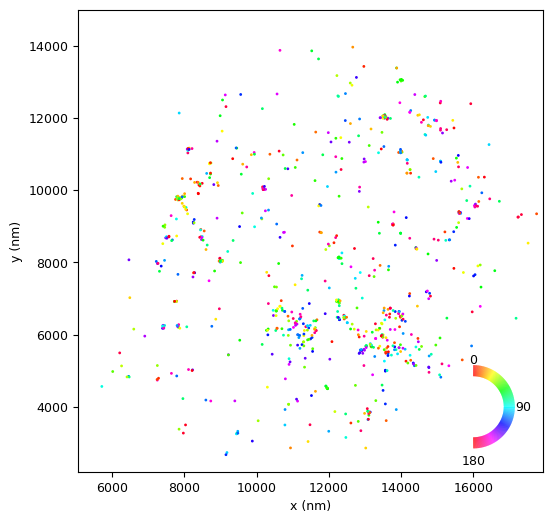

In [15]:
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams.update({'font.size': 9})
hues = rho_start[threshold2] / 180.0
hsv_colors = np.stack((hues, np.ones_like(hues), np.ones_like(hues)), axis=1)
rgb_colors = hsv_to_rgb(hsv_colors)
plt.scatter(x_start[threshold2], y_start[threshold2], c=rgb_colors, s=1)
plt.axis('equal')
plt.xlim((5000, 18000))
plt.ylim((2200, 15000))
plt.xlabel('x (nm)')
plt.ylabel('y (nm)')

# Half-circle colorbar rotated 90° clockwise
center_x, center_y = 16000, 4000
radius = 1000
angles = np.linspace(0, np.pi, 200)  # rotated arc
for i in range(len(angles)-1):
    theta1, theta2 = angles[i], angles[i+1]
    hue = (np.degrees(theta1)) / 180.0  # Map to 0-1 range
    color = hsv_to_rgb([hue, 1, 1])
    arc_x = [center_x + radius * np.cos(np.pi/2-theta1), center_x + radius * np.cos(np.pi/2-theta2)]
    arc_y = [center_y + radius * np.sin(np.pi/2-theta1), center_y + radius * np.sin(np.pi/2-theta2)]
    plt.plot(arc_x, arc_y, color=color, lw=8, solid_capstyle='butt')

# Tick labels with offset
tick_angles = [0, 90, 180]  # Corresponding to hue range
label_offset = [300,400, 500]
for i, ang in enumerate(tick_angles):
    rad = np.radians(ang)
    tx = center_x + (radius + label_offset[i]) * np.cos(np.pi/2-rad)
    ty = center_y + (radius + label_offset[i]) * np.sin(np.pi/2-rad)
    plt.text(tx, ty, f"{(ang)}", ha='center', va='center', fontsize=9)

plt.show()

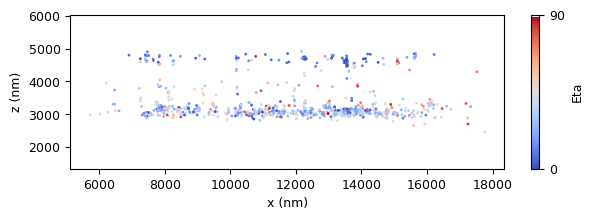

In [18]:
plt.rcParams['figure.figsize'] = [7,2]
normalized = eta90[threshold2] / 90.0

color_data = eta90[threshold2] / 90.0  # Normalize your color data


rgb_colors = hsv_to_rgb(hsv_colors)
scatter = plt.scatter(x[threshold2] , z[threshold2], cmap='coolwarm', c = color_data, s=1)
plt.axis('equal')

# Add colorbar
cb = plt.colorbar(scatter)
cb.set_label('Eta')
cb.set_ticks([0.0, 1.0])
cb.set_ticklabels(['0', '90'])
plt.xlabel('x (nm)')
plt.ylabel('z (nm)')
plt.show()

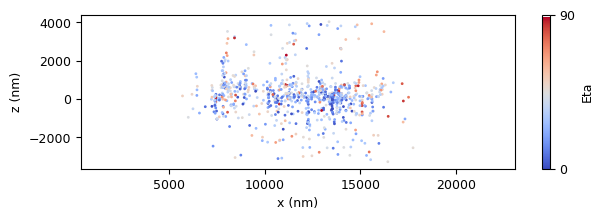

In [19]:
plt.rcParams['figure.figsize'] = [7,2]
normalized = eta90[threshold2] / 90.0

color_data = eta90[threshold2] / 90.0  # Normalize your color data


rgb_colors = hsv_to_rgb(hsv_colors)
scatter = plt.scatter(x_start[threshold2] , z_start[threshold2], cmap='coolwarm', c = color_data, s=1)
plt.axis('equal')

# Add colorbar
cb = plt.colorbar(scatter)
cb.set_label('Eta')
cb.set_ticks([0.0, 1.0])
cb.set_ticklabels(['0', '90'])
plt.xlabel('x (nm)')
plt.ylabel('z (nm)')
plt.show()

(np.float64(5109.108924194605),
 np.float64(18359.079617503256),
 np.float64(2107.260880499869),
 np.float64(14527.9354847624))

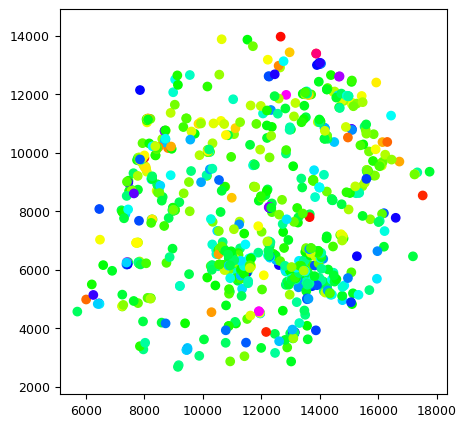

In [20]:
plt.rcParams['figure.figsize'] = [5,5]
hues = rho[threshold] / 180.0
hsv_colors = np.stack((hues, np.ones_like(hues), np.ones_like(hues)), axis=1)

rgb_colors = hsv_to_rgb(hsv_colors)
plt.scatter(x[threshold] , y[threshold] , c = rgb_colors)
plt.axis('equal')


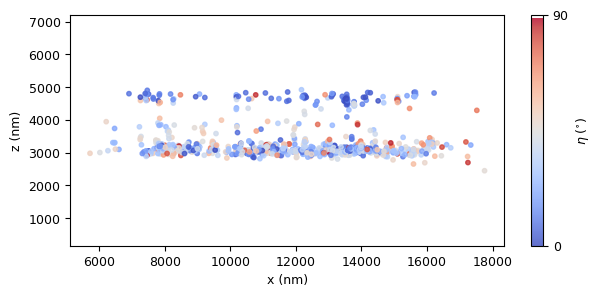

In [21]:
plt.rcParams['figure.figsize'] = [7,3]
x_vals = x[threshold]
z_vals = z[threshold]
color_data = eta90[threshold] / 90.0  # Normalize your color data

# Create scatter plot with color mapping
scatter = plt.scatter(x_vals, z_vals, c=color_data, cmap='coolwarm', s=10, alpha=0.8)
plt.axis('equal')

# Add colorbar
cb = plt.colorbar(scatter)
cb.set_label('$\\eta$ $(^{\\circ})$')
cb.set_ticks([0.0, 1.0])
cb.set_ticklabels(['0', '90'])
plt.xlabel('x (nm)')
plt.ylabel('z (nm)')
plt.show()


Text(0, 0.5, 'Occurences')

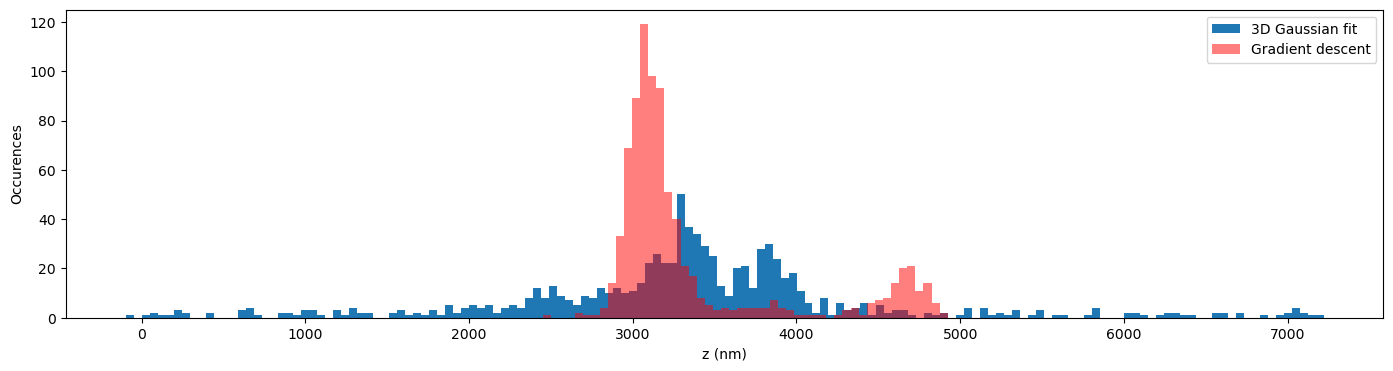

In [25]:
plt.rcParams['figure.figsize'] = [17,4]
plt.rcParams.update({'font.size': 10})
offset=np.mean(z[threshold2])-np.mean(z_start[threshold2])
h2 = plt.hist(z_start[threshold2]+offset, bins=150, label='3D Gaussian fit')
h1 = plt.hist(z[threshold2], bins=50, alpha=0.5, color='r', label='Gradient descent')
plt.legend()
#plt.xlim((-1200,4600))
plt.xlabel('z (nm)')
plt.ylabel('Occurences')

In [26]:
z_start = -z_start

In [40]:
off = 5000

In [41]:
n1 = 1.52
n2 = 1.33
epsilon = -(0.638)/(4*0.001*(z[threshold2])*n2)
mm = np.sqrt(n1**2-n2**2)
xi = (n2/n1)*(1-epsilon-(mm/n1)*np.sqrt(epsilon*(epsilon-2)))/(1-((n2/n1)**2)*epsilon*(2-epsilon))
#xi = np.mean(xi)
print(xi)

0       0.745051
2       0.750240
3       0.743979
4       0.746663
5       0.747748
          ...   
6192    0.739912
6193    0.747153
6302    0.750251
6304    0.747723
6305    0.750251
Name: z, Length: 828, dtype: float64


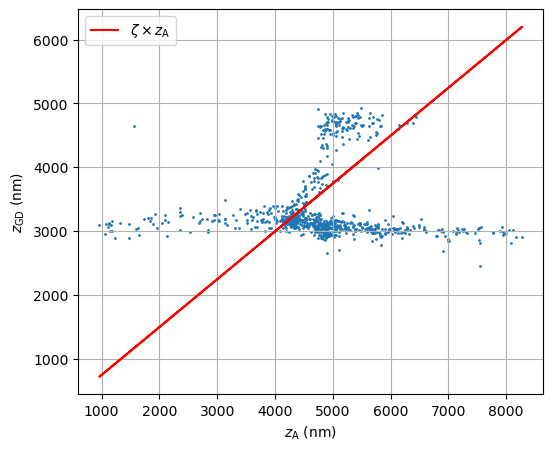

In [42]:
plt.rcParams['figure.figsize'] = [6,5]
plt.rcParams.update({'font.size': 10})
plt.scatter(z_start[threshold2]+off, z[threshold2], s=1)
plt.plot(z_start[threshold2]+off, (np.mean(xi))*(z_start[threshold2]+off), c='r', label='$\\zeta \\times z_{\\mathrm{A}}$')
plt.legend()
#plt.xlim((-500, 3500))
#plt.ylim((200, 2000))
plt.xlabel('$z_{\\mathrm{A}}$ (nm)')
plt.ylabel('$z_{\\mathrm{GD}}$ (nm)')
plt.grid()

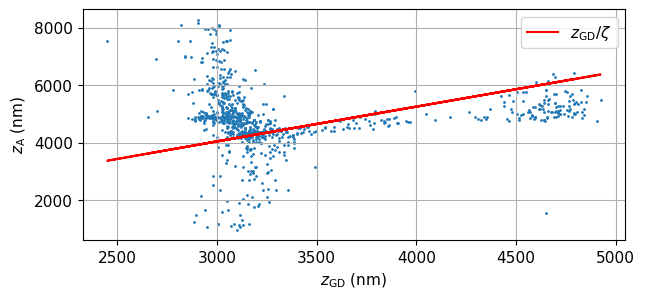

In [43]:
plt.rcParams['figure.figsize'] = [7,3]
plt.rcParams.update({'font.size': 11})
plt.scatter(z[threshold2], z_start[threshold2]+off, s=1)
plt.plot(z[threshold2], (1/xi)*(z[threshold2]), c='r', label='$z_{\\mathrm{GD}} / \\zeta$')
plt.legend()
#plt.xlim((400, 1700))
#plt.ylim((200, 2500))
plt.xlabel('$z_{\\mathrm{GD}}$ (nm)')
plt.ylabel('$z_{\\mathrm{A}}$ (nm)')
plt.grid()

Text(0, 0.5, 'Occurences')

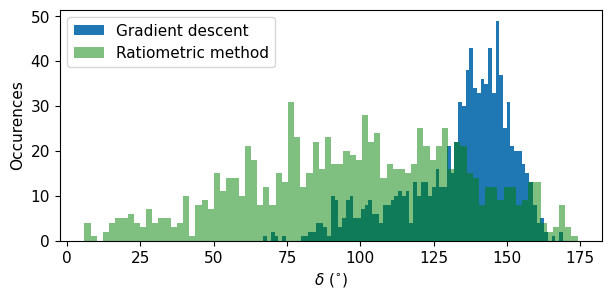

In [36]:
plt.rcParams['figure.figsize'] = [7,3]
hist = plt.hist(delta[threshold4], bins=80, label='Gradient descent')
hist = plt.hist(delta_start[threshold4], bins=80, alpha=0.5, label='Ratiometric method', color='g')
plt.legend()
plt.xlabel('$\\delta$ $(^{\\circ})$')
plt.ylabel('Occurences')